In [6]:
import pandas as pd
import numpy as np
import os
import time
from keras.models import Sequential, Model
from keras.layers import Conv1D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
import mlflow
from utility import read_data,write_result

In [9]:
cwd = os.getcwd()
#path = cwd[0:len(cwd)-(len(cwd.split("/")[-1])+len(cwd.split("/")[-2])+1)] + "data/realAdExchange"
path = cwd[0:len(cwd)-(len(cwd.split("/")[-1])+len(cwd.split("/")[-2])+1)] + "data"
data_files = read_data(path)

In [25]:
result_files = data_files
for key,value in data_files.items():
    for folder_key,df in value.items():
        nb_features = 1
        window_size = 10
        model = Sequential()
        model.add(Conv1D(nb_filter=5, kernel_size=10, input_shape=(window_size, nb_features), activation='relu'))
        model.add(Flatten())
        model.add(Dense(20, activation='relu'))
        model.add(Dense(1, activation='relu'))
        model.summary()
        model.compile(loss='mse', optimizer='adam')
        error_prediction = []
        for i in np.arange(11,len(df)):
            L = 10 #window size
            X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
            Y_input = df["value"].values[i].reshape((1,1))
            history = model.fit(X_input,Y_input , nb_epoch=20, verbose=0)
            error_prediction.append((model.predict(X_input)-Y_input)[0][0])
        temp_no_error = [0]*11
        error_prediction = temp_no_error + error_prediction
        df['anomaly_score'] = error_prediction
        result_files[key][folder_key] = df

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=10, input_shape=(10, 1), activation="relu", filters=5)`
  import sys
/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 5)              55        
_________________________________________________________________
flatten_2 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1, 5)              55        
_________________________________________________________________
flatten_3 (F

In [33]:
write_result(algorithm_name='cnn_prediction',data_files=result_files,results_path='/home/abdulliaqat/Desktop/thesis/NAB/results')

In [31]:
data_files.keys()

dict_keys(['realTweets', 'realKnownCause', 'artificialWithAnomaly', 'realTraffic', 'README.md', 'artificialNoAnomaly', 'realAdExchange'])

In [5]:
#data_files = read_data(data_folder_path=cwd[0:len(cwd)-(len(cwd.split("/")[-1])+len(cwd.split("/")[-2])+1)] + "data")

In [6]:
#df = pd.read_csv(path+"/exchange-2_cpm_results.csv")
#df.head()

,timestamp,value
0,2011-07-01 00:00:01,0.401048
1,2011-07-01 01:00:01,0.392719
2,2011-07-01 02:00:01,0.309996
3,2011-07-01 03:00:01,0.212939
4,2011-07-01 04:00:01,0.205801


In [7]:
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

In [9]:
nb_features = 1
window_size = 10
model = Sequential()
model.add(Conv1D(nb_filter=5, kernel_size=10, input_shape=(window_size, nb_features), activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mse', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 5)              55        
_________________________________________________________________
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=10, input_shape=(10, 1), activation="relu", filters=5)`
  after removing the cwd from sys.path.


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


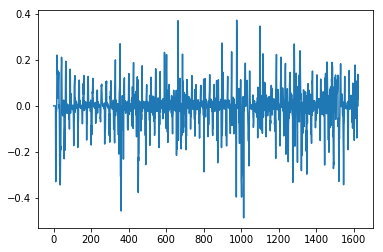

In [22]:
error_prediction = []
for i in np.arange(11,len(df)):
    #i = 11
    L = 10 #window size
    X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
    Y_input = df["value"].values[i].reshape((1,1))
    history = model.fit(X_input,Y_input , nb_epoch=20, verbose=0)
    error_prediction.append((model.predict(X_input)-Y_input)[0][0])
temp_no_error = [0]*11
error_prediction = temp_no_error + error_prediction
df['anomaly_score'] = error_prediction
#plt.plot(error_prediction)
#plt.show()

In [21]:
len(error_prediction)

1622